# Safas tracking

This notebook demonstrates the use of the "matcher" function in "safas.matcher"

Pseudo-algorithm: 

* We want to track an object $X$ through a time series of images. 
* Assume that we have identified the object, $X$, in image $N$, at time $t$. 
* For object $X$ in the binary image, calculate the area, $a_X$, and centroid, $c_X$.
* Now we want to determine which object in image $N + 1$ at time $t + \Delta t $ corresponds to object $X$
* Calculate area and centroid of each objects in binary image $N+1$
* For $X$ and each object in frame $N+1$, calculate the pair-wise distances, $C$, and area difference, $A$
* Apply the weighting parameters to each array, $p_{dist}$ and $p_{area}$.
* Find which combination of objects produces the minimum error: $min( p_{dist} C + p_{area} A) $ 
* Apply the error threshold to ensure a reasonable quality match was obtained.


In [8]:
from glob import glob
from skimage.measure import regionprops
import numpy as np
import cv2
from safas.filters.sobel_focus import imfilter
from safas.comp import matcher

# 1 two image files that represent "t0" and "t1"
files = sorted(glob('data/trackex/*.png'))

# 2 setup input for the "matcher" function: 
# 2.1 filter the images
params = {'img_thresh': 160,
          'edge_thresh': 150,
          'edge_distance': 1,
          'focus_filter': True,
          'clearborder_filter': True,
          'contour_color': (0,255,0),}

t0, imgt0 = imfilter.imfilter(src=cv2.imread(files[0]), **params)
t1, imgt1 = imfilter.imfilter(src=cv2.imread(files[1]), **params)

# 2.2 apply regionprops to analyze the binary images t0 and t1
A_props = regionprops(t0)
B_props = regionprops(t1)

# 3 apply the "matcher" function
# 3.1 set the criteria for the match function
criteria = {'error_threshold': 2500,
            'distance': 1,
            'area': 1,
            'squared': False,
           }
# 3.2 apply the matcher function to each tracked object. in this example, we 
# that each object in image t0 will be tracked in image t1: 
for A_prop in A_props: 
    # test each "tracked" object (A_prop) in image t0 against "new" objects in image t1 (B_props)
    B_matches, err_min = matcher.matcher(A_props=[A_prop],
                                A_ids=[0],
                                B_props=B_props,
                                B_ids=np.arange(0,len(B_props)),
                                criteria=criteria)
    
    print('index of best match in t1: %d, error: %0.1f' % (B_matches, err_min))


index of best match in t1: 0, error: 91.7
index of best match in t1: 1, error: 38.7
index of best match in t1: 2, error: 65.8
index of best match in t1: 3, error: 42.9
index of best match in t1: -99999, error: 4703.9


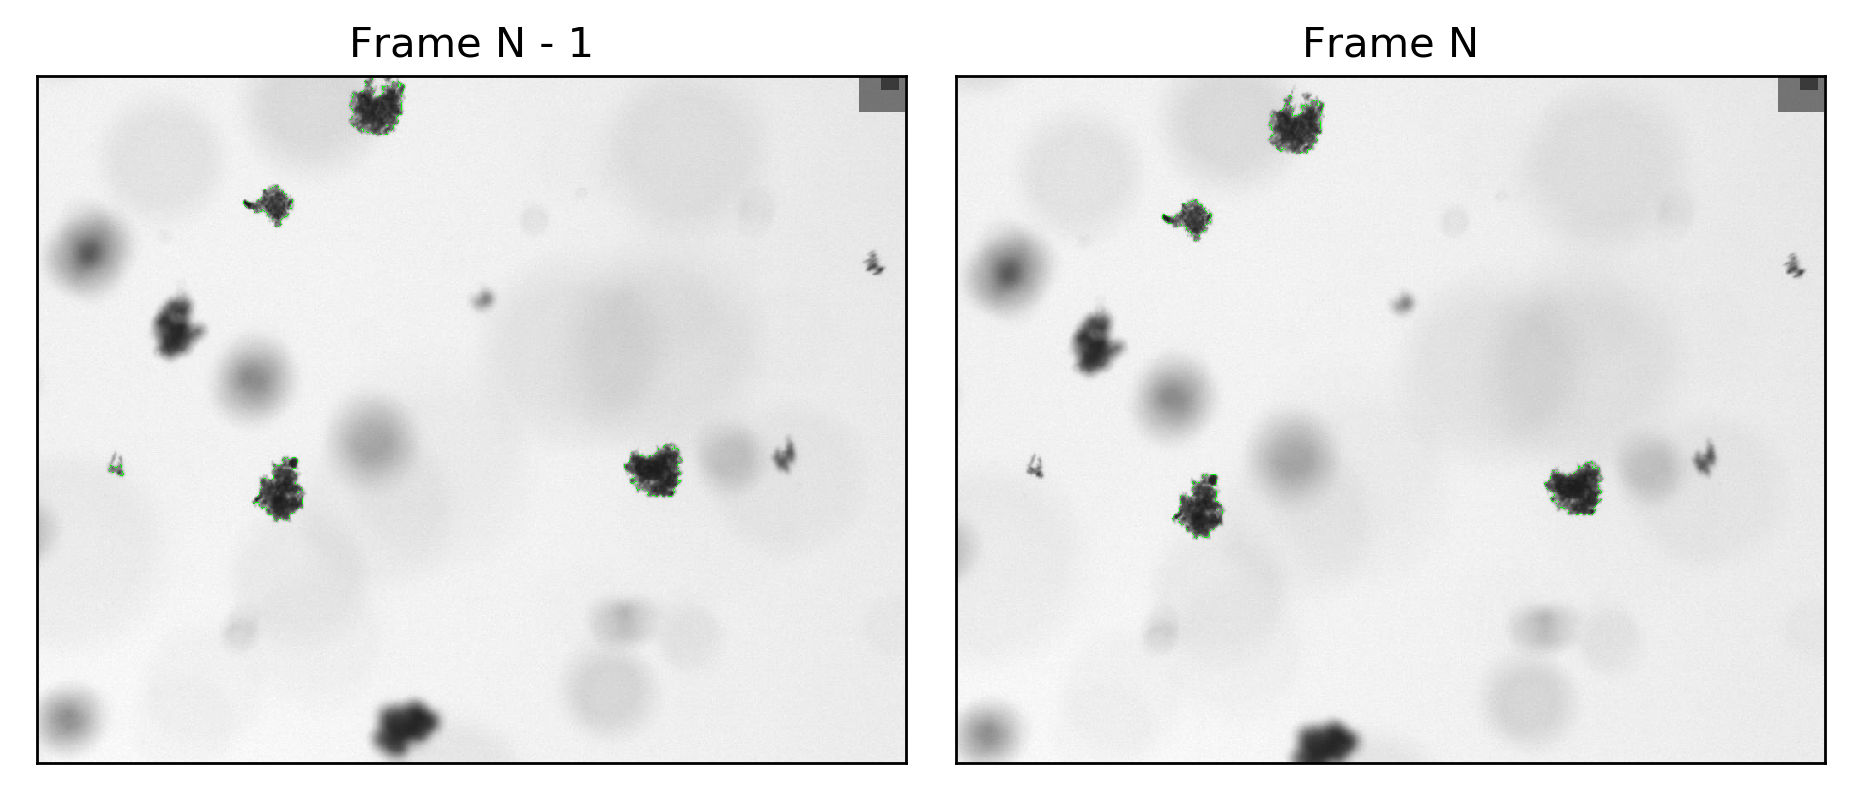

In [5]:
import matplotlib.pyplot as plt

f, ax  = plt.subplots(1,2, dpi=250, figsize=(7.5, 3.5))
ax = ax.ravel()
for a in ax: 
    a.set_xticks([])
    a.set_yticks([])
    
ax[0].imshow(imgt0)
ax[0].set_title('Frame N - 1')
ax[1].imshow(imgt1)
ax[1].set_title('Frame N')

plt.tight_layout()

save = True

if save: 
    plt.savefig('png/track_ex.png', dpi=900)